<a href="https://colab.research.google.com/github/prissyyy/Studi-Independen/blob/main/36-SN12_KNN-Image-Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Senin, 8 November 2021 (Image Classification in CV)

REFERENSI

- [Open CV Face Recognition Berbasis Algoritma Haar Cascade in medium.com](https://medium.com/purwadhikaconnect/opencv-face-recognition-berbasis-algoritma-haar-cascade-1a5e23d9e8cb)
- [Jurnal ttg Implementasi Face Mask Detection Berbasis Machine Learning](http://journal.stmikjayakarta.ac.id/index.php/jisamar/article/view/399)

In [ ]:
#import library yang digunakan
import pickle, gzip
import numpy as np
import urllib.request

In [ ]:
#Download dataset dari dropbox
url = "https://www.dropbox.com/s/d3hz2dli4z6imfl/mnist_1000.pkl.gz?dl=1"
u = urllib.request.urlopen(url)
data = u.read()
u.close()
 
with open('mnist_1000.pkl.gz', "wb") as f :
    f.write(data)

In [ ]:
## load dataset

f = gzip.open('/content/mnist_1000.pkl.gz', 'rb')
trainData, trainLabels, valData, valLabels, testData, testLabels = pickle.load(
    f, encoding='latin1')
f.close()
 
print("training data points: {}".format(len(trainLabels)))
print("validation data points: {}".format(len(valLabels)))
print("testing data points: {}".format(len(testLabels)))

training data points: 1000
validation data points: 200
testing data points: 200


In [ ]:
#Lihat label data

print('label datanya : ', np.unique(trainLabels))
print('ukuran matriks tiap datanya : ', trainData[0].shape)

label datanya :  [0 1 2 3 4 5 6 7 8 9]
ukuran matriks tiap datanya :  (784,)


In [ ]:
#Visualisasikan 10 data training pertama:
import matplotlib.pyplot as plt

for i in range(10):
  image = trainData[i].reshape((32,32))
  print('label = ', trainLabels[i])
  plt.imshow(image, cmap="Greys")
  plt.show()

ValueError: ignored

Ups... kok code diatas gak bisa/error? karena ukuran reshapenya disitu 32x32, sementara data matriks aslinya disimpan dalam ukuran 784x1 (lihat output kodingan diatasnya). 32x32 tidak sama dengan 784x1, sehingga dia tidak mau direshape ke 32x32. Harus yang sama hasilnya, misalnya 28x28 (karena 28x28 = 784), seperti dibawah ini :

label =  5


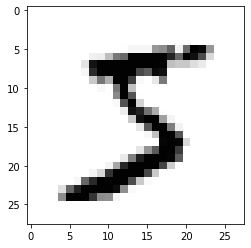

label =  0


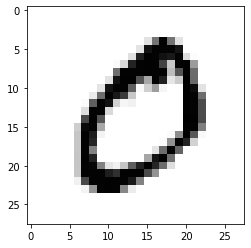

label =  4


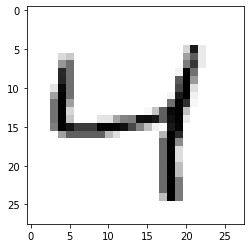

label =  1


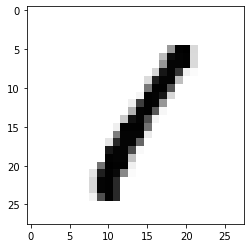

label =  9


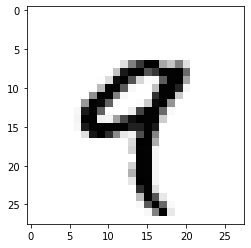

label =  2


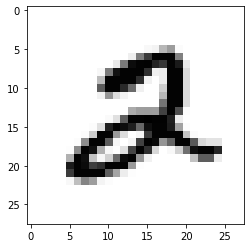

label =  1


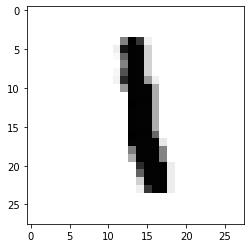

label =  3


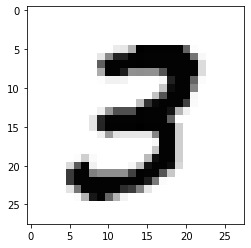

label =  1


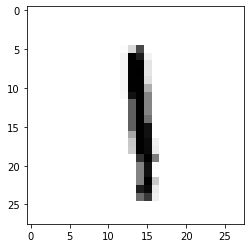

label =  4


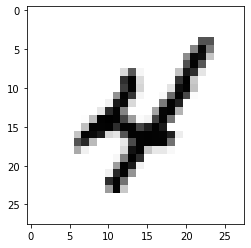

In [ ]:
#Visualisasikan 10 data training pertama:
import matplotlib.pyplot as plt

for i in range(10):
  image = trainData[i].reshape((28,28))
  print('label = ', trainLabels[i])
  plt.imshow(image, cmap="Greys")
  plt.show()

In [ ]:
#import KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
## Melatih model
 
for k in [1, 3, 5, 7, 9, 11, 13, 15, 25]:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(trainData, trainLabels)
 
    score = model.score(valData, valLabels)
    print(k, score) 

1 0.88
3 0.88
5 0.86
7 0.845
9 0.85
11 0.835
13 0.815
15 0.81
25 0.795


In [ ]:
# melatih ulang classifier menggunakan nilai k terbaik value dan memprediksikan label
model = KNeighborsClassifier(n_neighbors=3)
model.fit(trainData, trainLabels)
accuracy = model.score(testData, testLabels)
print("Achieved accuracy of %.2f%% on test data" % (accuracy*100))

Achieved accuracy of 85.50% on test data


In [ ]:
from sklearn.metrics import classification_report
predictions = model.predict(testData)
print("Classification Report")
print(classification_report(testLabels, predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        17
           1       0.80      1.00      0.89        28
           2       0.80      0.75      0.77        16
           3       0.92      0.75      0.83        16
           4       0.95      0.68      0.79        28
           5       0.94      0.85      0.89        20
           6       1.00      0.90      0.95        20
           7       0.88      0.92      0.90        24
           8       1.00      0.70      0.82        10
           9       0.66      0.90      0.76        21

    accuracy                           0.85       200
   macro avg       0.88      0.84      0.85       200
weighted avg       0.87      0.85      0.85       200



In [ ]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix")
print(confusion_matrix(testLabels, predictions))

Confusion Matrix
[[17  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 1  2 12  0  0  0  0  1  0  0]
 [ 0  2  1 12  0  0  0  0  0  1]
 [ 0  1  0  0 19  0  0  0  0  8]
 [ 0  1  0  1  1 17  0  0  0  0]
 [ 2  0  0  0  0  0 18  0  0  0]
 [ 0  1  0  0  0  0  0 22  0  1]
 [ 0  0  2  0  0  1  0  0  7  0]
 [ 0  0  0  0  0  0  0  2  0 19]]


In [ ]:
testData

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)